In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


### Plot compare W
<img src = '../../images/plot_compare_w.jpg'/>

[0.997832936590969, 0.9834100529310611, 0.8113734388277656, 0.2656539493468841]
[0.9999998259028207, 0.9998789004436184, 0.9983612346975379, 0.9943505133688442]
[0.9999999791137093, 0.9992409822982703, 0.9496163006014037, 0.9308581272885017]


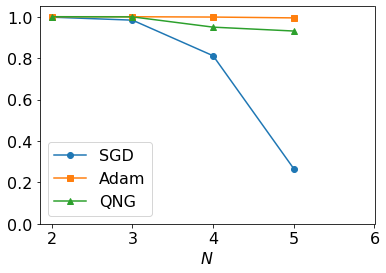

In [8]:
# w chain
#plt.figure(figsize = (14.28,5))
ansatz = 'walternating'
qubits = [2, 3, 4, 5]
if ansatz == 'wchain':
    sgd_ls = [2, 3, 5, 5]
    adam_ls = [1, 2, 3, 4]
    qng_ls = [1, 1, 3, 4]
if ansatz == 'walternating':
    sgd_ls = [3, 5, 5, 5]
    adam_ls = [1, 3, 4, 5]
    qng_ls = [1, 2, 4, 4]
if ansatz == 'walltoall':
    sgd_ls = [3, 5, 5, 5]
    adam_ls = [1, 2, 3, 3]
    qng_ls = [2, 3, 4, 5]
for optimizer in ['sgd', 'adam', 'qng']:

    fidelitiess = []
    for j in range(0, len(qubits)):
        
        if optimizer == 'sgd':
            marker = 'o'

            path = "../../experiments/tomography/tomography_" + \
                ansatz + "_" + str(sgd_ls[j]) + '/' + \
                str(qubits[j]) + '/fidelities.csv'
        if optimizer == 'adam':
            marker = 's'
            path = "../../experiments/tomography/tomography_" + ansatz + "_" + \
                str(adam_ls[j]) + '/' + str(qubits[j]) + \
                '/fidelities_' + optimizer + '.csv'
        if optimizer == 'qng':
            marker = '^'
            path = "../../experiments/tomography/tomography_" + ansatz + "_" + \
                str(qng_ls[j]) + '/' + str(qubits[j]) + \
                '/fidelities_' + optimizer + '.csv'
        fidelities = pd.read_csv(path, sep=",", header=None)
        fidelities = fidelities.applymap(lambda s: complex(s.replace('i', 'j'))).values
        fidelities = (np.real(fidelities))
        fidelitiess.append(np.max(fidelities))

    if optimizer == 'sgd':
        label = 'SGD'
    if optimizer == 'adam':
        label = 'Adam'
    if optimizer == 'qng':
        label = 'QNG'
    print(fidelitiess)
    plt.plot(range(2, 6), fidelitiess, label=label, marker=marker)

plt.xticks(np.arange(2, 7, 1), size=16)
plt.yticks([])
plt.yticks(np.arange(0.0, 1.2, 0.2), size=16)
#plt.xlim(2, 6)
plt.ylim(0.0, 1.05)
plt.xlabel('$N$', size=16)
#plt.ylabel('Fidelity', size=16)
plt.legend(prop={'size': 16}, loc=3)
plt.savefig("./images/" + ansatz + '_compare_layers.svg', format='svg', dpi=1000)
plt.show()


### Compare W

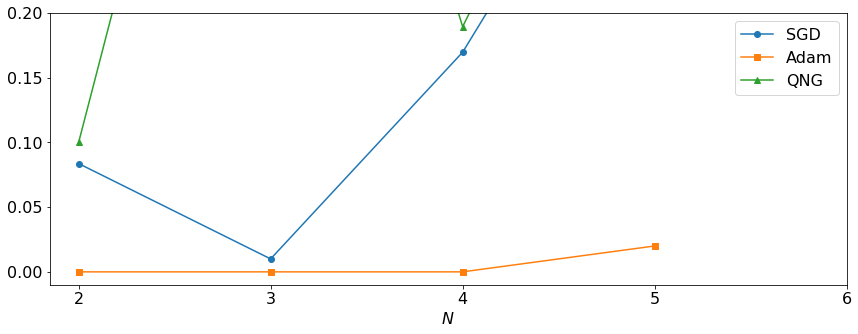

In [15]:
# w chain
plt.figure(figsize = (14.28,5))
ansatz = 'walltoall'
qubits = [2, 3, 4, 5]
if ansatz == 'wchain':
    sgd_ls = [2, 3, 5, 5]
    adam_ls = [1, 2, 3, 4]
    qng_ls = [1, 1, 3, 4]
if ansatz == 'walternating':
    sgd_ls = [4, 5, 5, 5]
    adam_ls = [2, 3, 4, 5]
    qng_ls = [2, 2, 4, 4]
if ansatz == 'walltoall':
    sgd_ls = [4, 5, 5, 5]
    adam_ls = [2, 2, 3, 3]
    qng_ls = [2, 2, 4, 5]
for optimizer in ['sgd', 'adam', 'qng']:

    loss_fubini_studys = []
    for j in range(0, len(qubits)):
        
        if optimizer == 'sgd':
            marker = 'o'

            path = "../../experiments/tomography/tomography_" + \
                ansatz + "_" + str(sgd_ls[j]) + '/' + \
                str(qubits[j]) + '/loss_values.csv'
        if optimizer == 'adam':
            marker = 's'
            path = "../../experiments/tomography/tomography_" + ansatz + "_" + \
                str(adam_ls[j]) + '/' + str(qubits[j]) + \
                '/loss_values_' + optimizer + '.csv'
        if optimizer == 'qng':
            marker = '^'
            path = "../../experiments/tomography/tomography_" + ansatz + "_" + \
                str(qng_ls[j]) + '/' + str(qubits[j]) + \
                '/loss_values_' + optimizer + '.csv'
        loss_values = pd.read_csv(path, sep=",", header=None).to_numpy()
        loss_fubini_study = np.sqrt(loss_values)
        loss_fubini_studys.append(np.min(loss_fubini_study))
    if optimizer == 'sgd':
        label = 'SGD'
    if optimizer == 'adam':
        label = 'Adam'
    if optimizer == 'qng':
        label = 'QNG'
    plt.plot(range(2, 6), loss_fubini_studys, label=label, marker=marker)

plt.xticks(np.arange(2, 7, 1), size=16)
plt.yticks([])
plt.yticks(np.arange(0.0, 0.25, 0.05), size=16)
#plt.xlim(2, 6)
plt.ylim(-0.01, 0.2)
plt.xlabel('$N$', size=16)
#plt.ylabel('Fidelity', size=16)
plt.legend(prop={'size': 16}, loc=1)
plt.savefig("./images/loss_" + ansatz + '_compare_layers.svg', format='svg', dpi=1000)
plt.show()


### Compare optimizer


[(0.9999997313755167-2.4974630924521485e-15j), (0.9605837151107697-9.919471060521046e-11j), (0.7099830473685202-9.895639255935729e-10j), (0.21592289086868682+8.985919178888802e-10j), (0.16914446950510145-7.074667657258615e-10j)]
[(0.9999982527199578+1.4578832932543584e-14j), (0.9999851792916419+2.7705485475260083e-14j), (0.9999029139240313-1.6634106201826593e-13j), (0.9996566707151641-3.5957050054449824e-13j), (0.9909285225668785+5.387452636784751e-13j)]
[(0.9999997702298269-3.300040362502754e-17j), (0.999996993034+1.9300424973500707e-15j), (0.9999771558723272-6.984885760064063e-14j), (0.8745580803158146-1.1817852252349326e-10j), (0.7091709975639672+6.009615652335931e-10j)]


C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


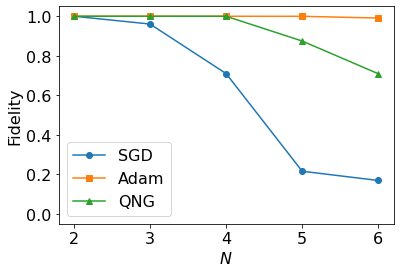

In [26]:
ansatz = 'wchain'
qubits = [2, 3, 4, 5, 6]
i = 5  # num layer
for optimizer in ['sgd', 'adam', 'qng']:

    fidelitiess = []
    for j in qubits:
        if optimizer == 'sgd':
            marker = 'o'
            path = "../../experiments/tomography/tomography_" + \
                ansatz + "_" + str(i) + '/' + str(j) + '/fidelities.csv'
        else:
            if optimizer == 'adam':
                marker = 's'
            else:
                marker = '^'
            path = "../../experiments/tomography/tomography_" + ansatz + "_" + \
                str(i) + '/' + str(j) + '/fidelities_' + optimizer + '.csv'
        fidelities = pd.read_csv(path, sep=",", header=None)
        fidelities = fidelities.applymap(
            lambda s: complex(s.replace('i', 'j'))).values
        fidelitiess.append(np.max(fidelities))
    if optimizer == 'sgd':
        label = 'SGD'
    if optimizer == 'adam':
        label = 'Adam'
    if optimizer == 'qng':
        label = 'QNG'
    print(fidelitiess)
    plt.plot(range(2, 7), fidelitiess, label=label, marker=marker)

plt.xticks(np.arange(2, 7, 1), size=16)
plt.yticks(np.arange(0, 1.2, 0.2), size=16)
plt.ylim(-0.05, 1.05)
plt.xlabel('$N$', size=16)
plt.ylabel('Fidelity', size=16)
plt.legend(prop={'size': 16}, loc=3)
# plt.savefig("./images/" + ansatz + '_compare.svg', format='svg', dpi=1000)
plt.show()


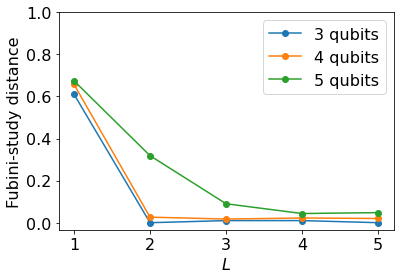

In [77]:
ansatz = 'wchain'
optimizer = 'adam'
qubits = [3, 4, 5]
for j in qubits:
    loss_fubini_studys = []
    for i in range(1, 6):
        if optimizer == 'sgd':
            path = "../../experiments/tomography/tomography_" + \
                ansatz + "_" + str(i) + '/' + str(j) + '/loss_values.csv'
        else:
            path = "../../experiments/tomography/tomography_" + ansatz + "_" + \
                str(i) + '/' + str(j) + '/loss_values_' + optimizer + '.csv'
        loss_values = pd.read_csv(path, sep=",", header=None).to_numpy()
        loss_fubini_study = np.sqrt(loss_values)
        loss_fubini_studys.append(np.min(loss_fubini_study))
    plt.plot(range(1, 6), loss_fubini_studys,
             label=str(j) + ' qubits', marker='o')

plt.xticks(np.arange(1, 6, 1), size=16)
plt.yticks(np.arange(0, 1.2, 0.2), size=16)
plt.xlabel('$L$', size=16)
plt.ylabel('Fubini-study distance', size=16)
plt.legend(prop={'size': 16}, loc=1)
plt.savefig("./images/" + ansatz + '_' + optimizer +
            '.svg', format='svg', dpi=1000)
plt.show()


C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


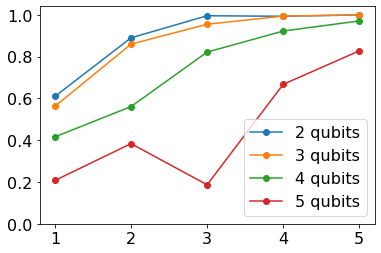

In [20]:
ansatz = 'walltoall'
optimizer = 'sgd'
qubits = [2, 3, 4, 5]
for j in qubits:
    fidelitiess = []
    for i in range(1, 6):
        if optimizer == 'sgd':
            path = "../../experiments/tomography/tomography_" + \
                ansatz + "_" + str(i) + '/' + str(j) + '/fidelities.csv'
        else:
            path = "../../experiments/tomography/tomography_" + ansatz + "_" + \
                str(i) + '/' + str(j) + '/fidelities_' + optimizer + '.csv'
        fidelities = pd.read_csv(path, sep=",", header=None)
        fidelities = fidelities.applymap(
            lambda s: complex(s.replace('i', 'j'))).values
        fidelitiess.append(np.max(fidelities))
    plt.plot(range(1, 6), fidelitiess, label=str(j) + ' qubits', marker='o')


plt.xticks(np.arange(1, 6, 1), size=16)
plt.yticks(np.arange(0, 1.2, 0.2), size=16)
# plt.xlabel('$L$', size = 16)
# plt.ylabel('Fidelity', size = 16)
plt.legend(prop={'size': 16}, loc=4)
plt.savefig("./images_fidelity/" + ansatz + '_' +
            optimizer + '.eps', format='eps', dpi=1000)
plt.show()


In [ ]:


path = "../../experiments/tomography_wchain_1/3/loss_values.csv"
loss_values = pd.read_csv(path, sep=",", header=None)
path = "../../experiments/tomography_wchain_1/4/loss_values.csv"
loss_values2 = pd.read_csv(path, sep=",", header=None)
path = "../../experiments/tomography_wchain_1/5/loss_values.csv"
loss_values3 = pd.read_csv(path, sep=",", header=None)
path = "../../experiments/tomography_wchain_2/3/loss_values.csv"


plt.plot(loss_values, label='3 qubits')
plt.plot(loss_values2, label='4 qubits')
plt.plot(loss_values3, label='5 qubits')
plt.xlabel('Iteration')
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.legend()
plt.show()


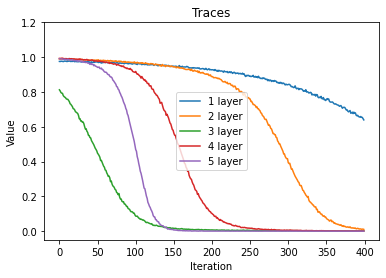

In [11]:
tracess = []

for i in range(1, 6):
    path = "../../experiments/tomography/tomography_walltoall_" + \
        str(i) + '/' + str(2) + '/loss_values_qng.csv'
    loss_values = pd.read_csv(path, sep=",", header=None)
    plt.plot(loss_values, label=str(i) + ' layer')

plt.xlabel('Iteration')
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.title('Traces')
plt.legend()
plt.show()


C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to rea

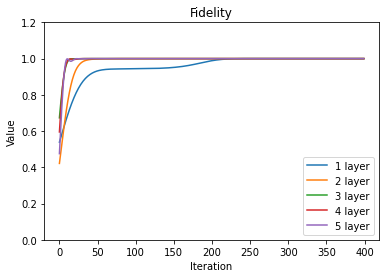

C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to rea

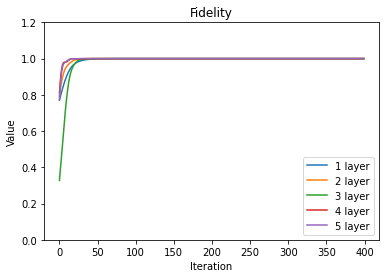

C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to rea

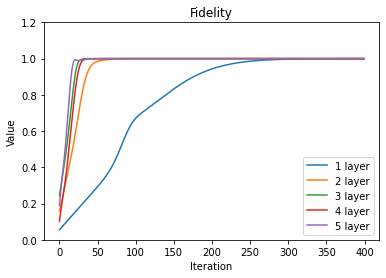

In [28]:
tracess = []
optimizer = 'adam'
for ansatz in ['wchain', 'walternating', 'walltoall']:
    for i in range(1, 6):
        path = "../../experiments/tomography/tomography_" + ansatz + "_" + \
            str(i) + '/' + str(2) + '/fidelities_adam.csv'
        fidelities = pd.read_csv(path, sep=",", header=None)
        fidelities = fidelities.applymap(
            lambda s: complex(s.replace('i', 'j'))).values
        plt.plot(fidelities, label=str(i) + ' layer')

    plt.xlabel('Iteration')
    plt.yticks(np.arange(0, 1.4, 0.2))
    plt.ylabel('Value')
    plt.title('Fidelity')

    plt.legend()
    plt.savefig("./images2qubit/" + ansatz + '_' +
                optimizer + '.png', format='png', dpi=1000)
    plt.show()
